Saving Sanciones_database_ocupada_limpio(Sheet1).csv to Sanciones_database_ocupada_limpio(Sheet1).csv
Archivo cargado: Sanciones_database_ocupada_limpio(Sheet1).csv


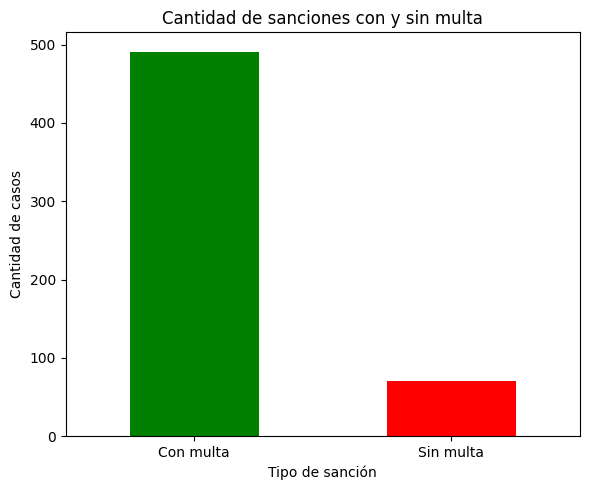

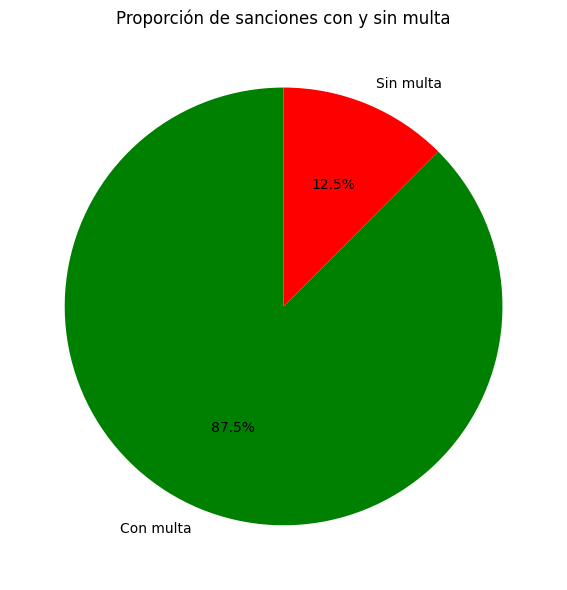

In [3]:
# PASO 1: Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# PASO 2: Subir archivo CSV desde tu computador
uploaded = files.upload()

# Obtener el nombre del archivo subido automáticamente
for nombre_archivo in uploaded.keys():
    file_name = nombre_archivo
    print(f"Archivo cargado: {file_name}")

# PASO 3: Leer el archivo
df = pd.read_csv(file_name, encoding='latin1')
df.columns = df.columns.str.strip()  # limpiar espacios extra

# PASO 4: Asegurarse de que la columna 'MULTA' sea numérica
df['MULTA'] = pd.to_numeric(df['MULTA'], errors='coerce')

# PASO 5: Clasificar las sanciones como con o sin multa
df['Multa aplicada'] = df['MULTA'].apply(lambda x: 'Con multa' if x > 0 else 'Sin multa')

# PASO 6: Contar los casos
conteo = df['Multa aplicada'].value_counts()

# PASO 7A: Gráfico de barras
plt.figure(figsize=(6, 5))
conteo.plot(kind='bar', color=['green', 'red'])
plt.title('Cantidad de sanciones con y sin multa')
plt.xlabel('Tipo de sanción')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# PASO 7B: Gráfico circular (torta)
plt.figure(figsize=(6, 6))
conteo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Proporción de sanciones con y sin multa')
plt.ylabel('')
plt.tight_layout()
plt.show()
